Title: Use food diet to predict deaths

Introduction: How can food and healthy diet help to improve healthy life and reduce the death rate? The current study indicated that a healthy diet is very important to prevent various infections. Keeping a healthy immune system is so important. However, little knowledge has been developed about which countries' deaths rate are associated with the different kinds of food intaking, neither do we know what is the importance of food with rich nutrition and improve eating habits to combat spreading diseases. This project uses three different machine learning algorithms to analyze the data of Food_Supply_kcal(percentage of energy intake). The model results should indicate how accurately the food diet can predict the countries' death rate. In addition, the ranking of feature importance should summarize the food and diet from high to low importance to predict deaths.

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import MinMaxScaler ## feature scaling

import matplotlib.pyplot as plt # visualization
import seaborn as sns
from termcolor import colored as cl # text customization
import itertools # advanced tools
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px


plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading data

In [117]:
data_path = '/Users/Zhang/notebooks/LearningFuze/'
image_path = '/Users/Zhang/notebooks/LearningFuze/output/'

In [118]:
death = pd.read_csv(data_path + 'data/Food_Supply_Quantity_kg_Data.csv')

In [119]:
death.head()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


In [120]:
death.dtypes

Country                          object
Alcoholic Beverages             float64
Animal fats                     float64
Animal Products                 float64
Aquatic Products, Other         float64
Cereals - Excluding Beer        float64
Eggs                            float64
Fish, Seafood                   float64
Fruits - Excluding Wine         float64
Meat                            float64
Milk - Excluding Butter         float64
Miscellaneous                   float64
Offals                          float64
Oilcrops                        float64
Pulses                          float64
Spices                          float64
Starchy Roots                   float64
Stimulants                      float64
Sugar & Sweeteners              float64
Sugar Crops                     float64
Treenuts                        float64
Vegetable Oils                  float64
Vegetables                      float64
Vegetal Products                float64
Obesity                         float64


In [121]:
death.columns = ['Country', 'Alcoholic_beverages', 'Animal_fats', 'Animal_Products',\
       'Aquatic_Products, Other', 'Cereals_Excluding_Beer', 'Eggs',\
       'Fish_Seafood', 'Fruits_Excluding Wine', 'Meat',\
       'Milk_Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',\
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar_Sweeteners',\
       'Sugar_Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables',\
       'Vegetal_Products', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths',\
       'Recovered', 'Active', 'Population', 'Unit']

In [122]:
death.shape

(170, 32)

In [123]:
death.columns

Index(['Country', 'Alcoholic_beverages', 'Animal_fats', 'Animal_Products',
       'Aquatic_Products, Other', 'Cereals_Excluding_Beer', 'Eggs',
       'Fish_Seafood', 'Fruits_Excluding Wine', 'Meat',
       'Milk_Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar_Sweeteners',
       'Sugar_Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables',
       'Vegetal_Products', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Population', 'Unit'],
      dtype='object')

##  data cleaning and preprocessing

In [124]:
death.isnull().sum()

Country                    0
Alcoholic_beverages        0
Animal_fats                0
Animal_Products            0
Aquatic_Products, Other    0
Cereals_Excluding_Beer     0
Eggs                       0
Fish_Seafood               0
Fruits_Excluding Wine      0
Meat                       0
Milk_Excluding Butter      0
Miscellaneous              0
Offals                     0
Oilcrops                   0
Pulses                     0
Spices                     0
Starchy Roots              0
Stimulants                 0
Sugar_Sweeteners           0
Sugar_Crops                0
Treenuts                   0
Vegetable Oils             0
Vegetables                 0
Vegetal_Products           0
Obesity                    3
Undernourished             7
Confirmed                  6
Deaths                     6
Recovered                  6
Active                     8
Population                 0
Unit                       0
dtype: int64

In [125]:
## plot the death to see any imbalanced data 
## the provided death is continous variables, so the problems is to be approaced by the regression model
## the output are numerical variables, it CANNOT be the categorical variables.
## Classification of "0,1" cannot be meaningful in this case
## Use MSE, MAE, RMSE for metrics

In [126]:
### replace null value the mean value
death['Obesity'].fillna((death['Obesity'].mean()), inplace=True)
death['Confirmed'].fillna((death['Confirmed'].mean()), inplace=True)
death['Recovered'].fillna((death['Recovered'].mean()), inplace=True)
death['Deaths'].fillna((death['Deaths'].mean()), inplace=True)

In [127]:
death.head()

,Country,Alcoholic_beverages,Animal_fats,Animal_Products,"Aquatic_Products, Other",Cereals_Excluding_Beer,Eggs,Fish_Seafood,Fruits_Excluding Wine,Meat,...,Vegetables,Vegetal_Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


In [128]:
death.shape

(170, 32)

In [129]:
## find the categorical variables
s = (death.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Country', 'Undernourished', 'Unit']


In [130]:
## drop unit
## process the categorical variable "Country","unit" and "Undernourished" using onehot encoding

In [133]:
## observe the value of undernourished
death['Undernourished'].value_counts()

<2.5    44
7.1      3
16.5     3
2.7      3
6.2      3
        ..
17       1
2.6      1
11       1
10.5     1
9.7      1
Name: Undernourished, Length: 98, dtype: int64

In [134]:
## replace the min to "2.5"
death['Undernourished_new'] = death['Undernourished'].str.replace('<2.5','2.5')

In [135]:
death['Undernourished_new'] = pd.to_numeric(death['Undernourished'], errors='coerce')

In [136]:
### use for loop to categorize 
## def f(x):
##    if x == 1: 
##        return 1
##    if (x >= 2.5) & (x < 10):
##        return 2
##    if (x >= 10) & (x < 20):
##        return 3
##    if x >= 20:
##        return 4
##    else:
##        return 'null'
## death['Undernourished_new'] = death.Undernourished_new.apply(f)

In [146]:
death['Undernourished_new'].fillna(death['Undernourished_new'].mean(), inplace=True)

In [147]:
death.Undernourished_new.describe()

count    170.000000
mean      14.457143
std       10.414519
min        2.500000
25%        7.275000
50%       14.457143
75%       14.457143
max       59.600000
Name: Undernourished_new, dtype: float64

In [148]:
death_new = death.drop(['Undernourished','Country','Unit'],axis = 1)

In [149]:
## use other ways to futher clean the data

In [150]:
death_new.drop_duplicates(inplace=True)

In [151]:
len(death_new.dropna())

162

In [152]:
death_new.dropna(inplace=True)

In [153]:
death_new.isnull().sum()

Alcoholic_beverages        0
Animal_fats                0
Animal_Products            0
Aquatic_Products, Other    0
Cereals_Excluding_Beer     0
Eggs                       0
Fish_Seafood               0
Fruits_Excluding Wine      0
Meat                       0
Milk_Excluding Butter      0
Miscellaneous              0
Offals                     0
Oilcrops                   0
Pulses                     0
Spices                     0
Starchy Roots              0
Stimulants                 0
Sugar_Sweeteners           0
Sugar_Crops                0
Treenuts                   0
Vegetable Oils             0
Vegetables                 0
Vegetal_Products           0
Obesity                    0
Confirmed                  0
Deaths                     0
Recovered                  0
Active                     0
Population                 0
Undernourished_new         0
dtype: int64

In [154]:
death_new.shape ## data ready to use

(162, 30)

In [165]:
death_new.describe

<bound method NDFrame.describe of      Alcoholic_beverages  Animal_fats  Animal_Products  \
0                 0.0014       0.1973           9.4341   
1                 1.6719       0.1357          18.7684   
2                 0.2711       0.0282           9.6334   
3                 5.8087       0.0560           4.9278   
4                 3.5764       0.0087          16.6613   
..                   ...          ...              ...   
165               2.5952       0.0403          14.7565   
166               1.4591       0.1640           8.5765   
167               0.0364       0.0446           5.7874   
168               5.7360       0.0829           6.0197   
169               4.0552       0.0755           8.1489   

     Aquatic_Products, Other  Cereals_Excluding_Beer    Eggs  Fish_Seafood  \
0                     0.0000                 24.8097  0.2099        0.0350   
1                     0.0000                  5.7817  0.5815        0.2126   
2                     0.0000       

In [ ]:
## feature scaling varies.. need further feature scaling

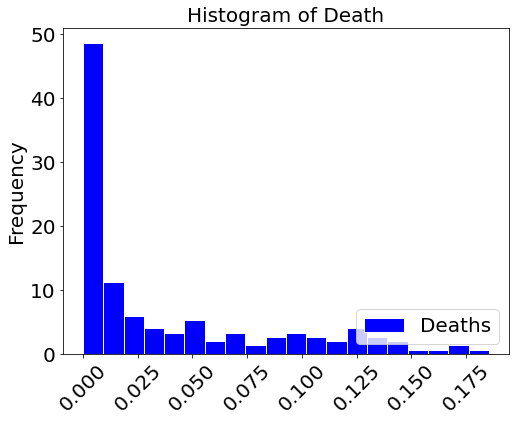

In [156]:
## plot the death rate
death_new.Deaths.plot(kind = 'hist', bins=20,density=True, figsize=(8,6),color = 'b',edgecolor='white', linewidth=1)
plt.title('Histogram of Death',size = 20);
plt.xlabel('',size = 20);
plt.ylabel('Frequency',size = 20);
plt.xticks(size = 20,rotation=45)
plt.yticks(size = 20)
plt.legend(loc=4, prop={'size': 20})
plt.savefig(r'output/age_hist.png', dpi=300, bbox_inches='tight')
plt.show()

In [157]:
## the distribution are extremely right skewed, majority of the data are close to "0" 
## transform the data to range of '0,1' use minmax.scale

## Feature engineering

In [160]:
## correklation matrix
death_new.corr()

,Alcoholic_beverages,Animal_fats,Animal_Products,"Aquatic_Products, Other",Cereals_Excluding_Beer,Eggs,Fish_Seafood,Fruits_Excluding Wine,Meat,Milk_Excluding Butter,...,Vegetable Oils,Vegetables,Vegetal_Products,Obesity,Confirmed,Deaths,Recovered,Active,Population,Undernourished_new
Alcoholic_beverages,1.000000,0.433924,0.351646,0.060102,-0.366784,0.147727,-0.008807,-0.196503,0.328021,0.265818,...,-0.097642,-0.270554,-0.351720,0.154923,0.362384,0.404866,0.262248,0.250366,-0.099160,0.036051
Animal_fats,0.433924,1.000000,0.633236,0.005328,-0.410585,0.275366,-0.067951,-0.241647,0.324346,0.573629,...,-0.145675,-0.013748,-0.633128,0.374338,0.494776,0.497139,0.388815,0.299180,-0.097362,-0.115072
Animal_Products,0.351646,0.633236,1.000000,0.000321,-0.537847,0.483142,-0.006359,-0.205165,0.585222,0.900917,...,-0.053824,0.073080,-1.000000,0.543293,0.593105,0.537762,0.414246,0.436103,0.002157,-0.266866
"Aquatic_Products, Other",0.060102,0.005328,0.000321,1.000000,-0.009767,0.073471,0.168633,-0.042335,0.071402,-0.096266,...,0.058724,0.135112,-0.000294,-0.107291,-0.074362,-0.067495,-0.064659,-0.036188,0.024388,-0.016677
Cereals_Excluding_Beer,-0.366784,-0.410585,-0.537847,-0.009767,1.000000,-0.218580,-0.017623,-0.294906,-0.428077,-0.443103,...,0.218289,-0.095876,0.537778,-0.542204,-0.443947,-0.395228,-0.324776,-0.305324,0.077202,0.215231
Eggs,0.147727,0.275366,0.483142,0.073471,-0.218580,1.000000,0.215998,-0.028750,0.468330,0.271334,...,0.170360,0.160291,-0.483060,0.405237,0.349954,0.338086,0.288253,0.192860,0.128237,-0.371242
Fish_Seafood,-0.008807,-0.067951,-0.006359,0.168633,-0.017623,0.215998,1.000000,0.052521,0.172046,-0.316335,...,-0.001467,-0.095855,0.006264,-0.121794,-0.139896,-0.223223,-0.152329,-0.019956,0.063055,-0.168203
Fruits_Excluding Wine,-0.196503,-0.241647,-0.205165,-0.042335,-0.294906,-0.028750,0.052521,1.000000,0.041540,-0.245771,...,-0.064330,-0.062434,0.205247,0.166679,-0.064547,-0.051840,-0.031237,-0.067826,-0.053453,-0.115048
Meat,0.328021,0.324346,0.585222,0.071402,-0.428077,0.468330,0.172046,0.041540,1.000000,0.240129,...,0.152553,-0.051778,-0.585247,0.544434,0.291187,0.271633,0.201181,0.217015,-0.027167,-0.229863
Milk_Excluding Butter,0.265818,0.573629,0.900917,-0.096266,-0.443103,0.271334,-0.316335,-0.245771,0.240129,1.000000,...,-0.117405,0.113820,-0.900899,0.436630,0.583901,0.544808,0.416001,0.416877,-0.011401,-0.166013


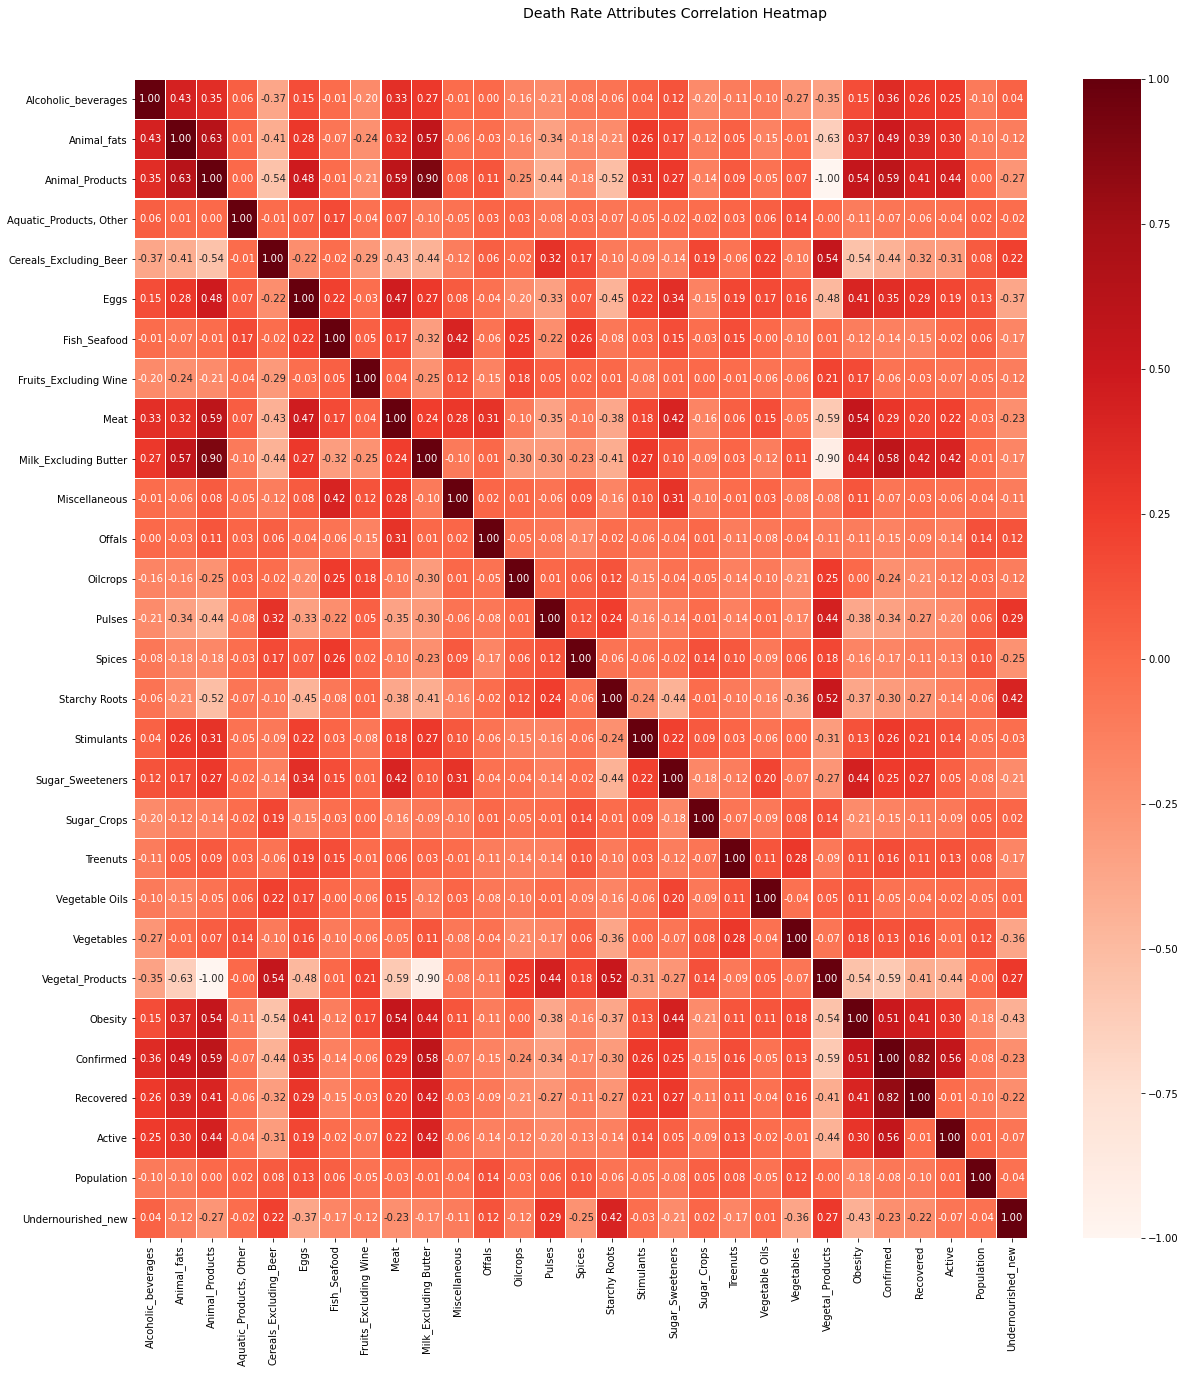

In [224]:
# for visualizing correlations
f, ax = plt.subplots(figsize=(20, 20))
corr = death_new.drop(['Deaths'],axis = 1).corr()
sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Reds",fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)
title = f.suptitle('Death Rate Attributes Correlation Heatmap', fontsize=14)

In [48]:
## there are no variables that have a strong correlation to all other variables. Therefore all variables are in the analysis
## the results show strong correlations such as confirmed, active and vegetable products
## other strong correlations such as cereals beers to Alcoholic, Miscellaneous and confirmed
## the results show the poor correlations such as animal products and Miscellaneous

## Train the data 

In [166]:
# visualize a minmax scaler transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot

In [167]:
# split into inputs and outputs
feature_cols = death_new.columns.drop(['Deaths'])
X = death_new[feature_cols]

# Create response vector (y)
y = death_new.Deaths

In [168]:
## transform the features 
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [ ]:
 y1 = numpy.log(y) 

In [169]:
## from sklearn.preprocessing import MinMaxScaler
## y = MinMaxScaler().fit_transform(y.values.reshape(-1, 1))

In [170]:
## transforamtion log square root
## np.log
## np.sqrt
## invert the 1.5 exponential

In [171]:
print(X.shape, y.shape)

(162, 29) (162, 1)


In [172]:
## Create the train/test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 ,random_state=99)

In [173]:
X_train.shape

(129, 29)

In [174]:
X_test.shape

(33, 29)

In [175]:
y_train.shape

(129, 1)

In [176]:
y_test.shape

(33, 1)

## Machine Learning

In [177]:
## Ridge regression
## optimal value of alpha for ridge regression when All coefficients zero, intercept score

In [219]:
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)

print(optimal_ridge.alpha_)

51.11433483440168


In [179]:
## calculate R2 of ridge regression
## R2 is high model looks good

train_preds = optimal_ridge.predict(X_train)
optimal_ridge.score(X_train, y_train)

0.7457705292376521

## cross-validate score

In [180]:
## calculate 10 folds Cross validation score and mean 
ridge_scores = cross_val_score(optimal_ridge, X_train, y_train, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))

[ 0.64835624 -1.24575822  0.68103556  0.58560431  0.68742083  0.67976125
  0.9267873   0.46463305  0.55394465  0.64532492]
0.4627109889016582


## Model Evaluation

In [181]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# use mean squared error, mean absolute error and R2 to evaluate the model.
def show_scores(model, X_train, X_test, y_train, y_test):    
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {'Training MAE': mean_absolute_error(y_train, train_preds),
              'Test MAE': mean_absolute_error(y_test, test_preds),
              'Training MSE': mean_squared_error(y_train, train_preds),
              'Test MSE': mean_squared_error(y_test, test_preds),
              'Training R^2': r2_score(y_train, train_preds),
              'Test R^2': r2_score(y_test, test_preds)}
    return scores

In [182]:
show_scores(optimal_ridge, X_train, X_test , y_train, y_test)

{'Training MAE': 0.08788279759995947,
 'Test MAE': 0.09766841301642266,
 'Training MSE': 0.01586825255699059,
 'Test MSE': 0.019777475874564826,
 'Training R^2': 0.7457705292376521,
 'Test R^2': 0.7655283935985668}

In [183]:
## use other models
## create pipeline
from sklearn.pipeline import Pipeline

regressor = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', Ridge(random_state=28))
])

## Machine learning 

In [188]:
## introduced other models of Support vector regressor and random forest
## remove SRV replace KNN or Decision tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

# First, we create a dict with our desired models
models = {'Ridge':Ridge(random_state=28),
          'Tree_model':DecisionTreeRegressor(max_depth=3, random_state=1),
          'RandomForest':RandomForestRegressor(),
          'XGBoost':XGBRegressor(n_estimators = 1000, learning_rate = 0.05)}

# Now to build the function that tests each model
def model_build(model, X_train, y_train, X_test, y_test, scale=True):
    
    if scale:
        regressor = Pipeline([
            ('scaler', StandardScaler()),
            ('estimator', model)
        ])
    
    else:
        regressor = Pipeline([
            ('estimator', model)
        ])

    # Training
    regressor.fit(X_train, y_train)

    # Scoring the training set

    train_preds = regressor.predict(X_train)
    print(f"R2 on single split: {regressor.score(X_train, y_train)}")

    # Cross validate
    cv_score = cross_val_score(regressor, X_train, y_train, cv = 10)

    print(f"Cross validate R2 score: {cv_score.mean()}")

    # Scoring the test set
    for k, v in show_scores(regressor, X_train, X_test , y_train, y_test).items():
        print("     ", k, v)

In [189]:
for name, model in models.items():
    print(f"==== Scoring {name} model====")
    
    if name == 'RandomForest' or name == 'XGBoost' or name == 'Tree_model':
        model_build(model, X_train, y_train, X_test, y_test, scale=False)
    else:
        model_build(model, X_train, y_train, X_test, y_test,)
    print()
    print(40*"=")

==== Scoring Ridge model====
R2 on single split: 0.7845369838535808
Cross validate R2 score: 0.3135307088249844
      Training MAE 0.07975768520668781
      Test MAE 0.12548331910652127
      Training MSE 0.013448564978127181
      Test MSE 0.02703423771224813
      Training R^2 0.7845369838535808
      Test R^2 0.6794959486017575

==== Scoring Tree_model model====
R2 on single split: 0.8724193342443952
Cross validate R2 score: -0.23906436571988604
      Training MAE 0.050648022608183886
      Test MAE 0.12021415333718251
      Training MSE 0.007963208276083027
      Test MSE 0.032642606579108
      Training R^2 0.8724193342443952
      Test R^2 0.6130060048978898

==== Scoring RandomForest model====


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



R2 on single split: 0.9600365098609667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning:

A column

Cross validate R2 score: 0.3584850817489603
      Training MAE 0.028977954458501442
      Test MAE 0.09346574656571785
      Training MSE 0.0024944030001060914
      Test MSE 0.021508654724380103
      Training R^2 0.9600365098609667
      Test R^2 0.7450044254006634

==== Scoring XGBoost model====
R2 on single split: 0.9999945996863524
Cross validate R2 score: 0.014167045758386121
      Training MAE 0.0004294742163599317
      Test MAE 0.09591190350028955
      Training MSE 3.3707162505585463e-07
      Test MSE 0.022560157245198435
      Training R^2 0.9999945996863524
      Test R^2 0.7325383510262025



In [221]:
## calculate the RMSE of all models
Ridge_RMSE = np.sqrt(0.02703423771224813)
Tree_RMSE = np.sqrt(0.032642606579108)
RF_RMSE = np.sqrt(0.021508654724380103)
XGBoost_RMSE = np.sqrt(0.022560157245198435)

In [222]:
print(Ridge_RMSE)
print(Tree_RMSE)
print(RF_RMSE)
print(XGBoost_RMSE)

0.16442091628575767
0.18067265033509639
0.14665829238191785
0.15020039029642512


In [82]:
## the results indicate the XGboosting has the lowest test MSE and test MAE
## the next is to hyperparameters tunning for XGBoosting

## hyperparameters tunning

In [190]:
## set up the pamareters for regression

xgb = XGBRegressor()

parameters = {'nthread':[4], 
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500, 1000]}

In [191]:
## use grid serve to find the best grid

from sklearn.model_selection import GridSearchCV

xgb_grid = GridSearchCV(xgb, parameters, cv = 5, n_jobs = 4, verbose = True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
0.6581217094063521
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 1000, 'nthread': 4, 'objective': 'reg:squarederror', 'subsample': 0.7}


In [192]:
xgb_best = XGBRegressor(colsample_bytree = 0.7,
                        learning_rate = 0.05,
                        max_depth = 5,
                        min_child_weight = 4,
                        n_estimators = 1000,
                        nthread = 4,
                        objective = 'reg:squarederror',
                        subsample = 0.7)

In [193]:
model_build(xgb_best, X_train, y_train, X_test, y_test, scale=False)

R2 on single split: 0.9999975744834902
Cross validate R2 score: 0.24166407136100304
      Training MAE 0.0002666098535987765
      Test MAE 0.09759677190788128
      Training MSE 1.513935754276887e-07
      Test MSE 0.02562983013153422
      Training R^2 0.9999975744834902
      Test R^2 0.6961458842953127


In [220]:
## calculate RMSE
Test_RMSE = np.sqrt(0.02562983013153422)
print(Test_RMSE)

0.1600931920211919


In [87]:
## plot feature importance graph

In [205]:
## re-define the tree model
Tree_model = DecisionTreeRegressor(max_depth=3, random_state=1)
Tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=1)

In [198]:
def plot_feature_importance(importance,names,model_type):

    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    df = pd.DataFrame(data)

    df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=df['feature_importance'], y=df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [199]:
## feature importance of XGboosting
pd.DataFrame({'feature':feature_cols, 'importance':xgb_best.feature_importances_}).sort_values(by = 'importance', ascending = False)

,feature,importance
24,Confirmed,0.449731
25,Recovered,0.108309
26,Active,0.054949
7,Fruits_Excluding Wine,0.031471
9,Milk_Excluding Butter,0.030755
27,Population,0.026440
17,Sugar_Sweeteners,0.025716
22,Vegetal_Products,0.023046
16,Stimulants,0.020717
14,Spices,0.019771


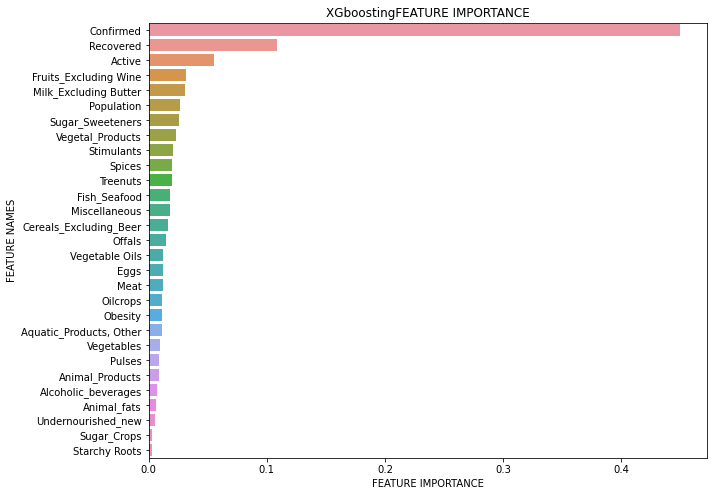

In [201]:
plot_feature_importance(xgb_best.feature_importances_,feature_cols,'XGboosting')

In [206]:
## feature importance of tree
pd.DataFrame({'feature':feature_cols, 'importance':Tree_model.feature_importances_}).sort_values(by = 'importance', ascending = False)

,feature,importance
24,Confirmed,0.902035
3,"Aquatic_Products, Other",0.052793
28,Undernourished_new,0.035983
25,Recovered,0.008069
7,Fruits_Excluding Wine,0.001120
16,Stimulants,0.000000
27,Population,0.000000
26,Active,0.000000
23,Obesity,0.000000
22,Vegetal_Products,0.000000


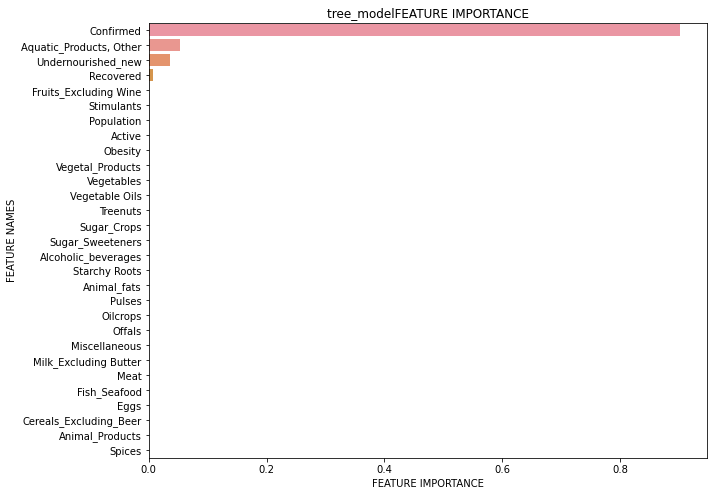

In [207]:
plot_feature_importance(Tree_model.feature_importances_,feature_cols,'tree_model')

In [215]:
## create tree graph

In [217]:
from sklearn.tree import export_graphviz
from sklearn import tree

export_graphviz(Tree_model, out_file='tree.dot', feature_names=feature_cols)

In [218]:
import pydotplus 

tree = tree.export_graphviz(tree_model, out_file=None) 
graph = pydotplus.graph_from_dot_data(tree) 
graph.write_jpg("output/food_deaths_tree.jpg") 

True

## Conclusion and Next step

The purpose of the study is to use the food diet and nutrition of countries to predict the death rate. The current study used four machine learning algorithms to predict the results.
The ridge regression results show the 10 folds cross-validation score is relatively high in the range of .46 ~.93. the average cross-validation score is .46. Test data MAE .098, and test MSE is 0.020. 
In comparing other three different models including decision tree, random forest, ensembled random forest, and XGboosting, the results of XGboosting seems the best with the lowest RMAE(the root of mean absolute error) and RMSE (root fo mean squared error). 
Further hyperparameter tunning is applied. The grid search is used to find the best parameter. The results of XGboosting indicated the test RMSE  =0.16. 
The feature importance was the plot for the decision tree and XGboosting. 
The XGBoosting model shows the ranking of the important features are confirmed, recovered, Active, Fruit_excluding wines and Milk_excluding butter, etc. The decision tree shows the ranking of the important features are confirmed, Acquatic_product, undernourished and recovered, etc. The decision tree shows at the confirmed rate <-.238, the predicted deaths are likely to be true. on the nodes of recovered of value -.09, 79 samples are assigned to two tree leaves, among them 68 cases predicted deaths are more likely to die if the confirmed <.-753, on the other hand, the leftover 11 cases who are predicted deaths are likely to be dead at the point of fruit_excluding wine is <.023

## Next step

From the results of the decision tree and XGboosting results, only a few features are important such as confirmed, Aquatic_products,  undernourished, and recovery. Next step I will continue to adjust the model with only useful features and rerun the model for improved model fit.  